# Exploratory Data Analysis (EDA)

## Discovery do Problema

**Problema:** Um e-commerce estava recebendo diversas reclamações no SAC referentes a produtos que não estavam sendo entregues ou que apareciam como indisponível durante longos períodos de tempo

**Entrevistas:**
- Clientes: Não recebiam os produtos
- Área de negócios: Diziam que era problema sistêmico, não era possível entender quantos produtos ainda não foram entregues
- Área de tecnologia: Problema de integração já foi arrumado, o pedido apenas não era enviado pelo time de logística
- Área de logística: Tinham caminhões/carros disponíveis para entregas, o problema era de disponibilidade do produto

**Causas:**
- Disponibilização de produtos no ecommerce que não tinha estoque
- Falta de previsibilidade de quais produtos precisavam ter mais estoque (raiz)

**Soluções:**
- Resolver problema sistêmico de produtos disponíveis, mas sem estoque e criar maior visibilidade para o time de negócios/logística
- Otimização do estoque com base na demanda (raiz)

**Ganhos:**
- Aumento do faturamento por diminuir a quantidade de compras canceladas por indisponibilidade
- Melhorar indicadores do time de logística/negócios, otimizando todo o trabalho

## Processo Estocástico

Família de variáveis aleatórias representando a evolução de um sistema de valores com o tempo.


### Exemplos
- Sequência aleatória
- Cadeia de Markov
- Processo de Poisson
- Propagação de Epidêmia
- Ruído Branco (white-noise)
- Passeio Aleatório

### Sequência Aleatória

Considerando $\{X_n, n=1,2,...\}$ uma sequência de variáveis aleatórias no espaço $\Omega$.

Para todo $n\geq1$, podemos escrever

$$P(X_1=a_1,...,X_n=a_n) = P(X_1=a_1)P(X_2=a_2|X_1=a_1)...P(X_n=a_n|X_1=a_1,...,X_{n-1}=a_{n-1})$$

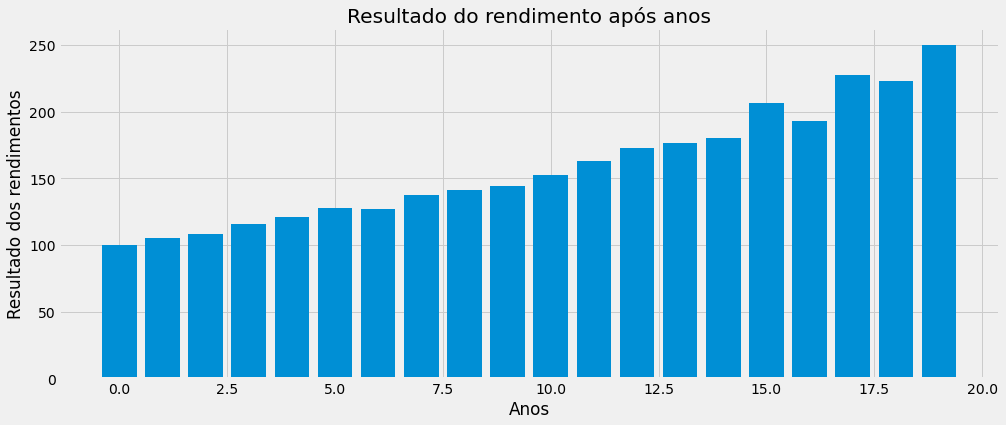

In [29]:
# Aplicação de investimento considerando variável aleatória R
total_anos = 20
aplicacao_inicial = 100
todos_rendimentos = [aplicacao_inicial]
quantidade_anos = [0]
for ano in range(0, total_anos):
    juros_anual = np.random.uniform(0.04, 0.05, 1)
    rendimento = aplicacao_inicial*(1 + juros_anual) ** ano
    todos_rendimentos.append(rendimento)
    quantidade_anos.append(ano)


plt.figure(figsize=(15, 6))
plt.bar(quantidade_anos, todos_rendimentos)
plt.title('Resultado do rendimento após anos')
plt.ylabel('Resultado dos rendimentos')
plt.xlabel('Anos')
plt.show()


### Cadeia de Markov
![https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Markovkate_01.svg/220px-Markovkate_01.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Markovkate_01.svg/220px-Markovkate_01.svg.png)

$$P(X_{n+1} = x | X_0, X_1, X_2, ..., X_n) = P(X_{n+1} = x | X_n)$$

Probabilidade de um evento acontecer, dado um evento anterior

In [35]:
# Representação de cadeia de markov
cadeia_markov = [
    [0.3, 0.7],
    [0.4, 0.6]
]
pd.DataFrame(data=cadeia_markov, columns=['E', 'A'], index=['E', 'A'])

,E,A
E,0.3,0.7
A,0.4,0.6


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from tslearn.metrics import soft_dtw


plt.style.use('fivethirtyeight')

Base de dados retirada de: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II#

Base de dados retirada de: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [80]:
# df = pd.read_excel('../data/raw/online_retail_II.xlsx')
df = pd.read_csv('../data/raw/sales_data_sample.csv', encoding="ISO-8859-1")


## Validando propriedades

### Tipagem e completude

In [81]:
display(df.head(1))
df.info()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.7,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [86]:
df['ORDERDATE'] = pd.to_datetime(df_t['ORDERDATE'])
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### Unicidade

In [82]:
df.nunique()

ORDERNUMBER          307
QUANTITYORDERED       58
PRICEEACH           1016
ORDERLINENUMBER       18
SALES               2763
ORDERDATE            252
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          92
PHONE                 91
ADDRESSLINE1          92
ADDRESSLINE2           9
CITY                  73
STATE                 16
POSTALCODE            73
COUNTRY               19
TERRITORY              3
CONTACTLASTNAME       77
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64

### Datas

In [87]:
print(df['ORDERDATE'].min())
print(df['ORDERDATE'].max())

2003-01-06 00:00:00
2005-05-31 00:00:00


## Análise gráfica

In [88]:
df_groupped = df.copy()

df_groupped['dt_year_month'] = (
    df_groupped['ORDERDATE'].dt.year*100
    + df_groupped['ORDERDATE'].dt.month
)

df_groupped['dt_year_month'] = pd.to_datetime(
    df_groupped['dt_year_month'], format='%Y%m')
df_groupped = df_groupped.groupby(
    ['PRODUCTCODE', 'dt_year_month']).agg(
        qt_sales=('QUANTITYORDERED', 'sum'),
        qt_avg_price=('SALES', 'mean')
).reset_index()
df_groupped.sort_values(['PRODUCTCODE', 'dt_year_month'], inplace=True)

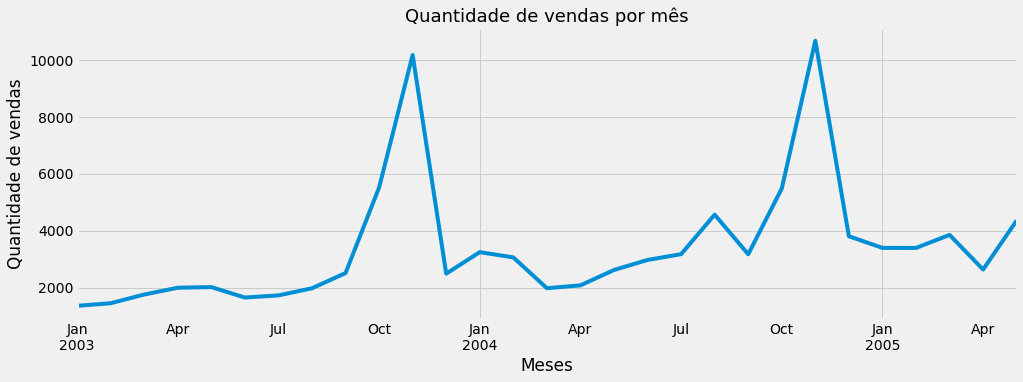

In [106]:
plt.figure(figsize=(15, 5))

df_sales = df_groupped.groupby('dt_year_month')['qt_sales'].sum()
df_sales.plot()
plt.xlabel('Meses')
plt.ylabel('Quantidade de vendas')
plt.title('Quantidade de vendas por mês', size=18)
plt.show()


In [111]:
# # Selecionando produtos que tem muito histórico
# all_stock_codes = (df_groupped
#     .groupby('PRODUCTCODE').agg(
#         qt_history=('dt_year_month', 'count'))
#     .reset_index()
#     .sort_values('qt_history', ascending=False)
#     .head(10))['PRODUCTCODE'].unique()
# all_stock_codes


# plt.figure(figsize=(20, 10))

# for index, stock_code in enumerate(all_stock_codes):
#     size = len(all_stock_codes)
#     half_size = int(size/2)

#     plt.subplot(half_size, 2, index + 1)
#     ax = df_groupped[
#         df_groupped['PRODUCTCODE'] == stock_code
#     ].set_index('dt_year_month')['qt_sales'].plot()
#     ax.grid(False)
#     plt.legend(title=f'Produto:{stock_code}')

# plt.suptitle('Quantidade de vendas por mês', size=18)
# plt.subplots_adjust(bottom=-1)
# plt.show()


### Propriedades de Séries Temporais

- **Tendência (T)**: indica o seu comportamento ao longo do tempo, ou seja, se é **crescente**, **decrescente** ou **estável**. Além disso, a tendência indica também a velocidade destas mudanças. 

- **Ciclos (C)**: são  **oscilações de subida e de queda nas séries**, de forma **suave e repetida**, ao longo da componente de tendência. Os movimentos cíclicos tendem a ser irregulares.

- **Sazonalidade (S)**: são **oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia**. Estes movimentos são facilmente previsíveis, ocorrendo em **intervalos regulares de tempo**. 

- **Ruído Aleatório ($\epsilon$)**: ou erro no período **t** são variações irregulares ou flutuações inexplicáveis, resultado de fatos fortuitos e inesperados.

Algumas ilustrações:


<img src="https://i2.wp.com/itfeature.com/wp-content/uploads/2014/06/Component-of-Time-Series-Data.jpg?resize=661%2C599" width=600>

#### Decomposição sazonal

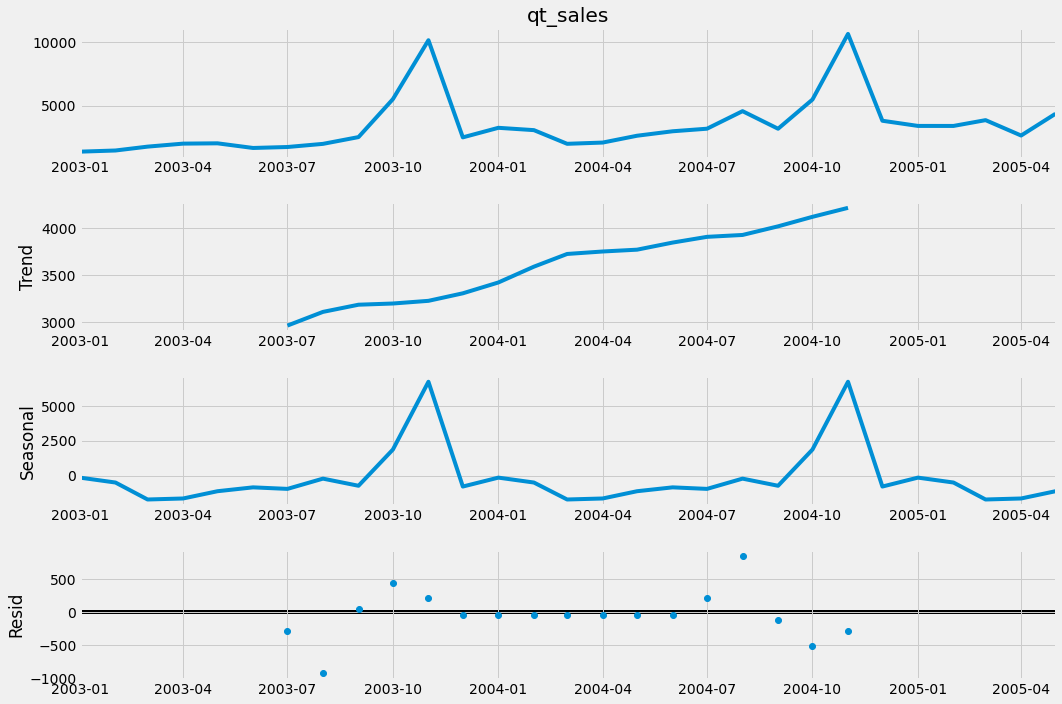

In [114]:
decomposed = sm.tsa.seasonal_decompose(df_sales, model='additive', period=12)

fig = decomposed.plot()
fig.set_size_inches((15, 10))
fig.tight_layout()

plt.show()


#### Autocorrelação parcial

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


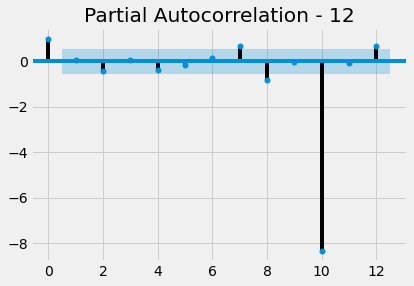

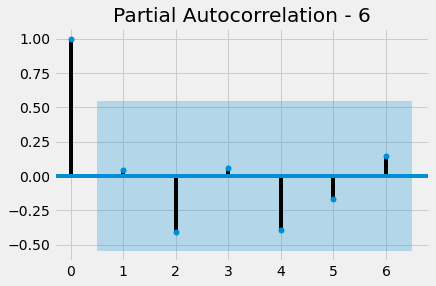

In [13]:
plot_pacf(df_groupped[
    df_groupped['StockCode'] == all_stock_codes[0]
].set_index('dt_year_month')['qt_sales'], lags=12, title='Partial Autocorrelation - 12')
plt.show()

plot_pacf(df_groupped[
    df_groupped['StockCode'] == all_stock_codes[0]
].set_index('dt_year_month')['qt_sales'], lags=6, title='Partial Autocorrelation - 6')
plt.show()


#### Comparando séries temporais

**Correlação de Pearson**
$$
r = \frac{\sum_{i=1}^N{(x_i - \overline{x})(y_i - \overline{y})}}{\sqrt{[\sum_{i=1}^n{(x_i - \overline{x})^2}][\sum_{i=1}^n{(y_i - \overline{y})^2}]}}
$$

**[Soft DTW](https://tslearn.readthedocs.io/en/stable/user_guide/dtw.html#dtw)**

$soft-DTW_{\gamma}(X, Y) = min^{\gamma}_{N}\sum_{(i, j) \in N}{||X_i, Y_i||^2}$
onde $min^{\gamma}_N$ é o operador soft-min com parametro $\gamma$

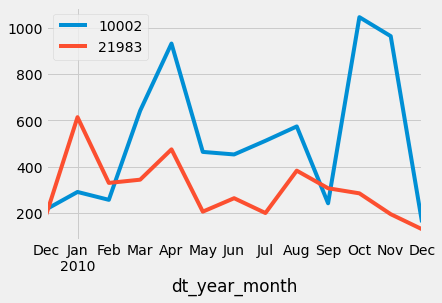

Correlação Pearson:


array([[1.        , 0.09999345],
       [0.09999345, 1.        ]])

soft_dtw: 863492.0


In [14]:
df_1.plot()
df_2.plot()
plt.legend([product_1, product_2])
plt.show()

correlation = np.corrcoef(df_1, df_2)
print('Correlação Pearson:')
display(correlation)

print('soft_dtw:', soft_dtw(df_1, df_2, gamma=0.01))


## Descobertas:

- Dados de StockCode não são apenas números, existem variações de produtos que tem letra no final
- Dados de StockCode podem aparecer no Description, dizendo é um mix de outro produto
- Existem quantidade de itens negativos. (Validar regra de negócio)
- Existem produtos com similaridade de vendas (formar cluster)
- Cada produto tem sua sazonalidade específica

## TO DO's:
- Limpar os campos de stockcode para conter apenas números
- Limpar os campos de stockcode para conter apenas 5 caracteres
- Identificar produtos que estão no description e substituir no stockcode
- Limpar observações de valores negativos (Regra de negócio)
- Podemos continuar considerando todos os campos nulos além dos de StockCode e Quantity pois assim conseguimos entender a demanda irrestrita, ou seja, o que o produto de fato irá vender (Regra de Negócio)